# E2 - Exercises on Numpy and Matplotlib


## Your first stochastic process

1. Generate an array of 20 elements that can be randomly $+1$ or $-1$. Write this in a function that takes as argument the number of points to generate (it will be useful later).

> **Hint**: use `np.random.randint()` and remember that if you sum or multiply a number to an array, the operation is done elementwise.

In [1]:
import numpy as np


a = np.random.randint(0,2,20)
print(a)

[1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1]


In [2]:
a*2 - 1

array([ 1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1])

In [3]:
def generate_random_num(num_points):
    random_num = np.random.randint(0, 2, num_points)
    return random_num*2 - 1

In [4]:
random_num_array = generate_random_num(25)
random_num_array

array([ 1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1])

2. Count the number of $1$s in your array. Do this in three ways. Write all the three methods as functions that take the array as argument and return the count.

> 2a. A fast way is to use the method `unique`, try to understand how this method works from the official documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

In [5]:
def unique_method(random_num_array):
    return np.unique(random_num_array, return_counts = True)

In [37]:
uniques = unique_method(random_num_array)
print(uniques)
print(uniques[1][1])

index_of_one = np.argmax(uniques[0]==1)
print(uniques[0]==1)
print(np.argmax(uniques[0]==1))

uniques[1][index_of_one]

(array([-1,  1]), array([11, 14], dtype=int64))
14
[False  True]
1


14

> 2b. Use a standard `for` loop to iterate over the elements and count the ones.

In [7]:
def forloop_method(random_num_array):
    counter = 0
    for i in random_num_array:
        if i == 1:
            counter += 1

    return counter

In [8]:
forloop_method(random_num_array)

14

> 2c. Use a boolean operation to select the elements equal to one, and use the method `.sum()` to count the true elements. in the resulting list of booleans.

In [9]:
def masking(random_num_array):
    mask = random_num_array > 0
    apply_mask = random_num_array[mask]
    return sum(apply_mask)

In [10]:
masking(random_num_array)

14

> 3 Extra. Which is the fastest way for an array containing 10^6 elements? Use the function written in 1 to generate the array.

> **Hint**: use the module time as in the final part of the numpy tutorial, and print how much time each of the three methods take.

In [11]:
from time import time

In [12]:
new_array = generate_random_num(10**6)

In [13]:
%%time
unique_method(new_array)

Wall time: 33.1 ms


(array([-1,  1]), array([499994, 500006], dtype=int64))

In [14]:
start = time()
print(unique_method(new_array))
end = time()
print(end - start)

(array([-1,  1]), array([499994, 500006], dtype=int64))
0.0341944694519043


In [15]:
start = time()
print(forloop_method(new_array))
end = time()
print(end - start)

500006
0.3775060176849365


In [16]:
start = time()
print(masking(new_array))
end = time()
print(end - start)

500006
0.07580423355102539


4. Test the "law of large numbers": compute the fraction of ones, $f$, as the number of the list elements $n$ increases. This generates a **stochastic trajectory** $f(n)$ that should converge to the probability that the event $+1$ is generated: $f(n) \rightarrow 0.5$ as $n \rightarrow \infty$. 

> First, write a function that takes as argument the maximum number of generated elements, $n_{max}$, and returns the array containing all the fractions of ones at each partial size: $(f(1), f(2), \ldots, f(n_{max}))$.

In [17]:
def law_large_num(random_num_array, max_num_points):
    new_array = generate_random_num(random_num_array)
    
    count_ones_list = []
    for i in range(1, max_num_points):
        count_ones = masking(new_array[:i])
        compute_frac = count_ones/i
        count_ones_list.append(compute_frac)
    return count_ones_list

In [29]:
output_law_large_num = law_large_num(10**6, 60)

> Then plot the fraction of ones, $f$, as a function of the size, $n$. Does it approach $0.5$ for large $n$? To better understand this, plot a horizontal dashed line corresponding to $y = 0.5$.

In [30]:
import matplotlib.pyplot as plt

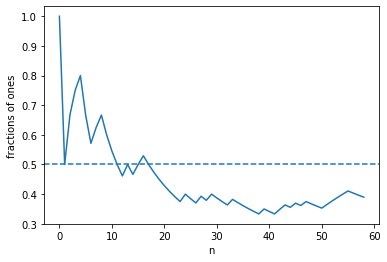

In [31]:
plt.plot(np.arange(59), output_law_large_num)
plt.axhline(y= 0.5, linestyle='--')
plt.xlabel('n')
plt.ylabel('fractions of ones')
plt.show()

> Finally, generate $R=20$ of those trajectories, building a small **ensemble** of your stochastic process. Plot all your trajectories in the same plot (you can easily do this with a `for` loop). Each realization is different from the other (they are random), however there are **statistical regularities** that you can immediately see: 

>> a. All your trajectories tend to stay around 0.5. This can be expected since the probability of getting $1$ is $0.5$. In some cases I can obtain several $+1$ in a row, leading to a trajectory that stays above $y=0.5$, in some other cases it can be that I obtain a lot of $-1$, and the trajectory will stay below the line. In the long run, you can expect that these two kind of events compensate each other since they have the same probability.

>> b. The trajectories are more dispersed for small sizes and tend to converge around $0.5$ for large $n$.



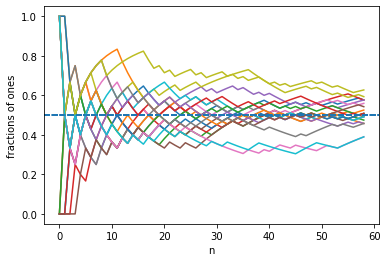

In [21]:
output = []
for i in range(20):
    output_law_large_num = law_large_num(10**6, 60)
    plt.plot(np.arange(59), output_law_large_num)
    plt.axhline(y= 0.5, linestyle='--')
    plt.xlabel('n')
    plt.ylabel('fractions of ones')
plt.show()

Now our aim is to make the two statements above more quantitative. It is important to understand that we are dealing with a random process, and the physical law that describes our variable $f$ cannot be predicted deterministically. However, looking at the "population" of different independent realizations of the process (our statistical ensemble) we can describe the behavior of $f(n)$ in a statistical sense.

5. We need a function that generates an ensemble of $R$ different sequences of size $n$, and computes the fraction of ones in each sequence.
The function takes as arguments $R$ and $n$ and returns an array containing the fractions of ones for each  realization $(f_1(n), f_2(n), \ldots, f_R(n))$. Use the best counter of ones in point 3 to improve the performance.

> The outcome of the function can be imagined as a slice of the final plot of point 4, where we cut the trajectories at a given $n$, and what we have is an ensemble of $f(n)$s.
Plot the histogram of the fraction of ones of $R=10000$ sequences of size $n=100$. Do you see that most of the values stay around $0.5$?

> The mathematical object that describes the behavior of the stochastic variable $f(n)$ is its **probability distribution**. You will see the right definition of probability distribution later in your courses, however this is basically equivalent to the histogram above with $R \rightarrow \infty$, and normalized in such a way that the area under the curve is $1$.
If you plot again the histogram, and add the property `density=True` within the `hist` function, you will get a normalized histogram, which is a good approximation of the actual probability distribution of $f(n)$. 

> Compute also the average and the standard deviation of the list of the stochastic variables for which you computed the histogram (use the numpy methods `mean` and `std`). The first corresponds to the typical value that you expect to find in your ensemble (the center of your distribution if it's symmetric) and the second one how much the values are dispersed around the average (the width of your distribution).

The next step is to describe how this two numbers, the average and the standard deviation, vary as a function of $n$.
These two object give us a statistical description of our stochastic dynamics. Namely, which the expected outcome is and how much the outcomes are dispersed around this expectation (for each $n$).

6. Fix the number of sequences to $R=200$, and compute the average and standard deviation of the fraction of ones for different values of $n$. It is not necessary to consider all the values of $n$, but, for example, you can compute these quatities at steps of $10$.

> Hint: use `np.linspace(start, stop, step, dtype=int)` to generate an array of $n$s from a `start` to a `stop` value at given `steps`. The last argument imposes that the elements are integers. 
Then iterate over this list, compute the ensemble of values using the function written before, and store the obtained mean and the standard deviation.

> Draw the average and the standard deviation  as a function of the size $n$ in two different plots as two subplots of the same figure. Test that:
>> - The average is, more or less, well approximated by the straight horizontal line $y=0.5$, saying that the typical number of ones that I expect to find in a sequence is always the same, independently of the sequence size.
>> - The variance approaches zero as $n \rightarrow \infty$. Later in your studies you will learn that it is also possible to analytically compute the dependency of the standard deviation on $n$, which is:
\begin{equation} \text{std}[f(n)] = \frac{n^{-1/2}}{2} \end{equation}
>> Plot this theoretical curve on the top of your simulation to see that they are almost identical. Show also the legend that says which curve is the theoretical and which is the simulated one.



7. Draw a nice plot contaning all the information that you got from this exercises (you should get similar images of the ones uploaded in the drive folder of this tutorial). In particular:
> * Draw an ensemble of trajectories as in the point 4.
> * On the top of them draw also the average that you computed above, and the two curves $\pm std + average$. Since the standard deviation gives the width of the distribution, you can expect that most of the trajectories will fall within these two curves.

> Another way to see the concentration of the trajectories as $n$ increases is to plot the probability distributions at different $n$s. Try, for example, to draw three distributions (as the one in point 5) at $n = 20, 100, 1000$, and a lot of realizations $R=10000$.
To see the distributions one above the others make them transparent using the property `alpha=[a number between 0 and 1]` in the `hist` function.

> Save the two plots by adding a line at the end of the cell with the matplotlib method:

In [ ]:
plt.savefig('figure_name.png', dpi=200)

> This will save the figures in files pf your current colab project. From there you can download them.
